In [3]:
import pandas as pd 
import plotly.express as px 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
DataFrame=pd.read_csv('Student_Marks.csv')


In [4]:
DataFrame

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


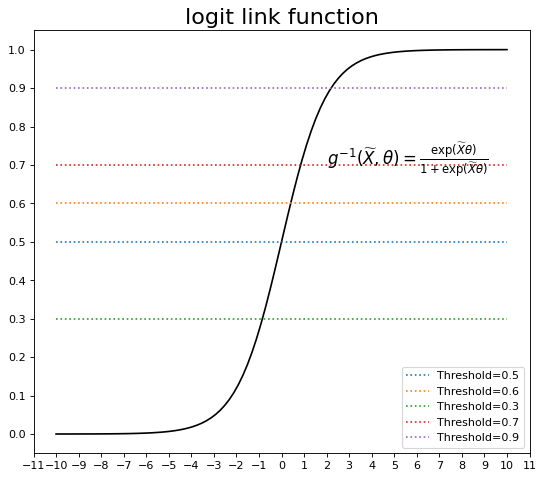

In [3]:
from matplotlib import pylab
import pylab as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 7), dpi=80)
#sigmoid = lambda x: 1 / (1 + np.exp(-x))
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
def ff(x):
    return 0.5

mySamples = []
mySigmoid = []

# generate an Array with value ???
# linespace generate an array from start and stop value
# with requested number of elements. Example 10 elements or 100 elements.
# 
x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)

# prepare the plot, associate the color r(ed) or b(lue) and the label 

plt.plot(y, sigmoid(y), 'black')
plt.plot(y, [0.5 for i in range(100)],linestyle='dotted', label="Threshold=0.5")
plt.plot(y, [0.6 for i in range(100)],linestyle='dotted', label="Threshold=0.6")
plt.plot(y, [0.3 for i in range(100)],linestyle='dotted', label="Threshold=0.3")
plt.plot(y, [0.7 for i in range(100)],linestyle='dotted', label="Threshold=0.7")
plt.plot(y, [0.9 for i in range(100)],linestyle='dotted', label="Threshold=0.9")
# Draw the grid line in background.

plt.legend()
# Title & Subtitle
plt.title('logit link function',fontsize=20)

# write the Sigmoid formula
plt.text(2,0.7, r'$g^{-1}(\widetilde{X},\theta)=\frac{\exp(\widetilde{X}\theta)}{1+\exp(\widetilde{X}\theta)}$', fontsize=15)


#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 


# create the graph
plt.show()


In [2]:
"Compute the ridge estimator"
def ridge_beta(lamb,X,Y,p):
    a=np.linalg.inv(np.dot(np.transpose(X),X)+lamb*np.eye(p))
    b=np.dot(a,np.transpose(X))
    c=np.dot(b,Y)
    return c

In [ ]:
from sklearn.linear_model import Lasso
def lasso_beta(lamb,X,Y,p):
    model = Lasso(alpha=lamb)
    model.fit(X,Y)
    coeffs=model.coef_
    return coeffs
    

In [96]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(len(var[0])):
    for j in range(len(var[0])):
        if i==j:
            var[i,i]=(i+1)/50
        else:
            var[i,j]=np.random.uniform(0.7,1,1)
print(var)
X=np.random.multivariate_normal(mean,var,n)
print(np.shape(X))
var2=np.eye(p)
beta=[1 for i in range(p)]
eps=np.random.multivariate_normal(mean,var2,30)
eps2=np.reshape(eps,-1)
eps3=eps[0,0:300]
print('The shape of eps3 is equal to:',np.shape(eps3))
print(np.shape(np.dot(X,beta)))
Y=np.transpose(np.dot(X,beta)+eps2)
print(np.shape(Y))
lamb=[50*i for i in range(1000000)]

[[0.02       0.91251575 0.86134703 ... 0.71963799 0.87938928 0.91920657]
 [0.70691208 0.04       0.91904843 ... 0.9982305  0.88456945 0.83970153]
 [0.91081267 0.97705149 0.06       ... 0.85234171 0.71148836 0.87390675]
 ...
 [0.84376527 0.7271451  0.94287066 ... 1.96       0.87046789 0.72706685]
 [0.82240779 0.72815077 0.80605815 ... 0.81766606 1.98       0.91123115]
 [0.78760243 0.92914879 0.85462043 ... 0.96989031 0.81569198 2.        ]]
(3000, 100)
The shape of eps3 is equal to: (100,)
(3000,)
(3000,)


/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_76409/3011436418.py:17: RuntimeWarning: covariance is not positive-semidefinite.
  X=np.random.multivariate_normal(mean,var,n)


In [97]:
kss=[]
p=100
for i in range(len(lamb)):
    kss.append(np.absolute(ridge_beta(lamb[i],X,Y,p)))
print(np.shape(kss))
print(kss[1])

(500000, 100)
[0.99005203 0.99421668 1.01834254 1.02988728 1.02223622 1.05013198
 0.98295169 0.99081199 0.98729713 0.96617492 0.9854822  0.99074303
 1.00847287 0.95999546 0.98103363 0.97972217 0.96873141 0.96640594
 0.97637454 0.99007617 1.01248372 0.97495218 0.93666946 1.0666354
 1.015193   1.06975624 0.97448125 1.01005517 0.95884857 0.97675297
 0.98114291 0.99747628 1.03121931 0.97373518 1.01426954 0.96700341
 0.9896141  1.02408104 1.01647562 0.98003016 1.05322864 1.00938184
 1.04724708 1.01774927 0.96183866 0.99447373 0.97219782 0.99608274
 1.04254948 0.95976398 0.98954919 0.96619862 0.99257943 1.00615959
 0.95549201 0.99638324 1.0089693  1.0171493  0.9912063  0.99758381
 1.02992851 1.00930943 0.98122804 1.03439481 1.02975872 0.9766711
 0.98247465 1.03015621 1.0031627  1.04732567 0.96018132 0.99519313
 0.97465456 1.01986704 1.00045857 1.01242465 1.09117497 1.01788721
 0.9556461  1.03688693 0.9954228  1.01957814 0.96624709 0.976983
 1.03576969 0.9742191  0.98021851 0.98353322 1.01386

In [98]:
ks=np.array(kss)
ksss=np.transpose(ks)
print(np.shape(ksss))
print(ksss[1])

(100, 500000)
[0.97834362 0.99421668 0.99316036 ... 0.0100513  0.01005128 0.01005126]


/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_76409/2104346115.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linestyle='--')


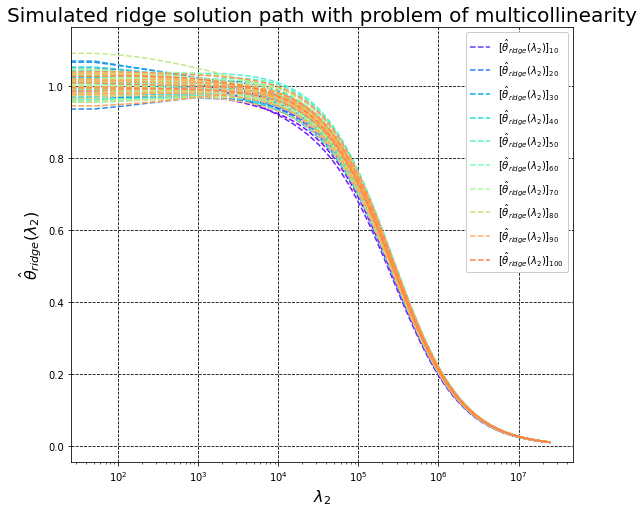

In [102]:
fig,ax=plt.subplots(figsize=(9,8))#figure and axes object(s) with size (10,10)
cmap=plt.cm.rainbow#setting different color for each seires
p=100
# slow loop plot t=(1to10)
for t in range (p): 
    if t==9:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{10}$')
    if t==19:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{20}$')
    if t==29:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{30}$')
    if t==39:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{40}$')
    if t==49:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{50}$')
    if t==59:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{60}$')
    if t==69:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{70}$')
    if t==79:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{80}$')
    if t==89:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{90}$')
    if t==99:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{100}$')

    else:
        ax.plot([50*i for i in range(500000)],ksss[t],'--',color=cmap(t/float(120)))
    
plt.xlabel(r'$\lambda_2$',fontsize=16)
plt.ylabel(r'$\hat{\theta}_{ridge}(\lambda_2)$',fontsize=16)
plt.title('Simulated ridge solution path with problem of multicollinearity',fontsize=20)
ax.set_xscale('log')
ax.set_facecolor("white")
ax.grid(b=True, which='major', color='black', linestyle='--')
ax.legend(facecolor='white',framealpha=1)
plt.show()

In [245]:

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
def lasso_beta(X,Y):
    model = LinearRegression()
    model.fit(X,Y)
    coeffs=model.coef_
    return coeffs
def lasso_beta2(lamb,X,Y,p):
    model = Lasso(alpha=lamb)
    model.fit(X,Y)
    coeffs=model.coef_
    return coeffs
def ridge_beta(lamb,X,Y,p):
    a=np.linalg.inv(np.dot(np.transpose(X),X)+lamb*np.eye(p))
    b=np.dot(a,np.transpose(X))
    c=np.dot(b,Y)
    return c
def linear_beta(X,Y,lam):
    model = Ridge(alpha=lam)
    model.fit(X,Y)
    coeffs=model.coef_
    return coeffs
def calcuate_variable(X,Y2,p,n,lam):
    beta2=ridge_beta(lam,X,Y2,p)
    yhat=np.dot(X,beta2)
    error=(np.subtract(Y2,yhat))
    return error


In [288]:
import numpy as np
n=50
p=[10,50,100,500]

lam=[0.001,50,100,0]
box=[]



In [256]:
for k in range(len(p)):
    mean=np.array([0 for i in range(p[k])])
    print(p[k])
    var2=np.eye(p[k])
    var=np.eye(p[k])
    for i in range(len(var[0])):
        var[i,i]=(i+1)/5
        for j in range(len(var[0])):
            var[i,j]=0.3
    
    X=np.random.multivariate_normal(mean,var,n)
    eps=np.random.multivariate_normal(mean,var2,30)
    eps2=np.reshape(eps,-1)[0:n]
    beta=[1 for i in range(p[k])]
    Y2=np.transpose(np.dot(X,beta)+eps2)
    box.append(calcuate_variable(X,Y2,p[k],n,0.000001))

TypeError: object of type 'int' has no len()

In [349]:
n=50
p=2000
mean=np.array([0 for i in range(p)])
print(p)
var2=np.eye(p)
var=np.eye(p)
for i in range(len(var[0])):
    var[i,i]=(i+1)/5
    for j in range(len(var[0])):
        var[i,j]=0.3

X=np.random.multivariate_normal(mean,var,n)
eps=np.random.multivariate_normal(mean,var2,30)
eps2=np.reshape(eps,-1)[0:n]
beta=[1 for i in range(p)]
Y2=np.transpose(np.dot(X,beta)+eps2)
box.append(calcuate_variable(X,Y2,p,n,0.0001))


2000


In [343]:
f=[]

In [350]:
x=np.absolute(np.subtract(Y2,calcuate_variable(X,Y2,p,n,0.0001)))

f.append(x)

In [338]:
print(f)

[array([ 0.32439837,  6.4935635 ,  6.20652016,  3.03814621,  6.04172118,
        1.24027355,  4.62628497,  7.62883811,  1.5590289 ,  4.11800401,
        2.45846697,  3.6931844 ,  4.51457278,  0.889842  ,  4.59677488,
        7.03906363,  8.69443743, 10.49819593,  0.24655417,  4.29624444,
        6.8034799 , 10.51249426,  4.591885  ,  1.89955289,  3.14239331,
        7.05569081,  5.41714583,  2.13529926,  1.02470551,  5.31730775,
        1.02672069,  4.71273681, 10.71154946,  3.43256302, 10.40039634,
        5.17798084,  1.52667396,  4.15727165,  3.59097857,  1.59108177,
        3.73548924,  1.82553722,  1.40353591,  3.05261777,  6.65251173,
        4.05081894,  1.13607229, 11.6026418 ,  2.04400353,  7.49362564]), array([30.79522005, 15.11311692,  0.06840731,  7.78140714, 61.82185785,
        4.01802016, 33.2839175 , 12.40051331, 10.1304115 , 33.79121681,
        6.76572646,  7.26101428, 20.00580647, 33.25570849,  5.42089762,
       13.27315194, 46.67533853, 30.81396715,  8.46549102, 31

Text(0, 0.5, 'Test errror $ : Y_{test}-X_{test}\\hat{\\theta}_{OLS}$')

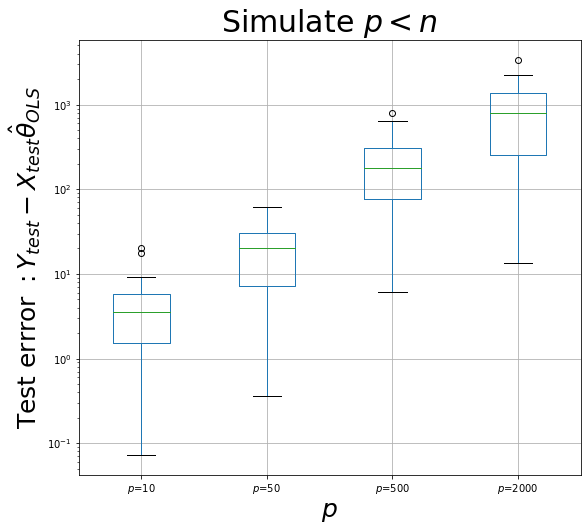

In [362]:
import pandas as pd 
from matplotlib import pyplot as plt 
fig = plt.figure(figsize =(9, 8))
data={r'$p$=10':f[0],r'$p$=$50$':f[1],r'$p$=$500$':f[2],r'$p$=$2000$':f[3]}
df=pd.DataFrame(data)
df.boxplot()
plt.yscale('log')
plt.title(r'Simulate $p<n$',fontsize=30)
plt.xlabel(r'$p$',fontsize=25)
plt.ylabel(r'Test errror $ : Y_{test}-X_{test}\hat{\theta}_{OLS}$',fontsize=25)